# OYC Company Cars Project Linear Regression 

In [399]:
from IPython.display import Image
from IPython.core.display import HTML
Image(url="https://www.google.com/url?sa=i&url=https%3A%2F%2Far.renault.com.sa%2Fconcept-cars%2Fconcept-cars.html&psig=AOvVaw0ubZM--RrY9F9zBPURLHpo&ust=1639602980267000&source=images&cd=vfe&ved=0CAsQjRxqFwoTCLjuwZub5PQCFQAAAAAdAAAAABAJ")

# Project Description
We are an OYC company that serves customers to buy the cars used they want with the required features.  We work to meet all customer requirements and provide them according to his specific budget and desired features.


## Table Content

### 1.import librares 

### 2.Web Scrapping

### 3.EDA

### 4.Feauters Enganiring 

### 5 Modeling

******************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

******************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

******************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

## 1. Import Part

In [90]:
import time,os
from bs4 import BeautifulSoup as bs
import html
import requests
import csv
import urllib
from urllib.request import urlopen
from itertools import zip_longest
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import pickle
import seaborn as sns
import http
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import re
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.linear_model import RidgeCV
from math import radians, cos, sin, asin, sqrt
from sklearn.preprocessing import PolynomialFeatures,StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
from sklearn import metrics
import numpy as np
%matplotlib inline


******************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

## 2. Web Scrapping Part

we scrape the data of cars from KSA motory website to easily measure the price of cars in the Saudi Market. web scrape 23976 rows and we will convert them into a data frame.

In [2]:
#path = "C:\\Users\\New\\desktop"
#file = open(path+"CarsData.csv","w")
#header = "cars_Name, cars_Price,cars_brand,cars_location,car_walk,car_counter,car_version\n"
#file.write(header)

In [3]:
web = requests.get("https://ksa.motory.com/en/cars-for-sale/?page=1")
src = web.content
soup = bs(src,"lxml")
car_info =soup.find_all("div",{"class":"col-md-12 vehicles-used-listing-item-inner vehicles-new-listing-item-inner d-md-flex"})

In [4]:
page = 1
list_car = []
list_price = []
list_brand=[]
list_location=[]
list_walk=[]
list_counter =[]
list_version=[]

while page != 75:
    url = f"https://ksa.motory.com/en/cars-for-sale/?page={page}"
    for container in car_info:
        for car_name in soup.find_all("a",{"class":"text ellipsis"}):
            list_car.append(car_name.text.strip())
            
        for car_price in soup.find_all("div",{"class":"price-container-value"}):
            list_price.append(car_price.text.strip())
            
        for car_brand in soup.find_all("div",{"class":"col-md-auto d-md-flex d-none icon makes align-items-center"}):
            list_brand.append(car_brand.text.strip())
            
        for car_location in soup.find_all("a",{"class":"col-md-auto col-12 icon city fas fa-map-marker-alt"}):
            list_location.append(car_location.text.strip())
            
        for car_walk in soup.find_all("div",{"class":"col-md-auto col-12 icon mileage fa fa-road d-flex"}):
            list_walk.append(car_walk.text.strip())
            
        for car_counter in soup.find_all("div",{"class":"col-md-auto col-auto icon transmission fa fa-cogs"}):
            list_counter.append(car_counter.text.strip())
            
        for car_version in soup.find_all("a",{"class":"col-md-auto col-12 icon year far fa-calendar d-flex"}):
            list_version.append(car_version.text.strip())
            

    page = page + 1


In [5]:
#len(car_name)

In [6]:
dictionary={'car_name': list_car , 'car_price':list_price,'car_brand': list_brand,'car_location': list_location,
            'car_walk':list_walk ,'car_version':list_version}
dictionary

{'car_name': ['MG RX5 2020',
  'Toyota Land Cruiser pickup 2021',
  'Hyundai Kona 2020',
  'Toyota Corolla 2020',
  'Toyota Hilux 2016',
  'Toyota FJ Cruiser 2019',
  'Hyundai Elantra 2022',
  'Toyota C-HR 2020',
  'Toyota Land Cruiser pickup 2015',
  'Toyota Hiace 2017',
  'Toyota Hiace 2017',
  'Chevrolet Spark 2019',
  'Renault Symbol 2020',
  'Renault Symbol 2020',
  'Renault Symbol 2020',
  'Renault Symbol 2020',
  'Renault Symbol 2020',
  'SAIC Motor  Maxus D60  2022',
  'MG RX5 2020',
  'Toyota Land Cruiser pickup 2021',
  'Hyundai Kona 2020',
  'Toyota Corolla 2020',
  'Toyota Hilux 2016',
  'Toyota FJ Cruiser 2019',
  'Hyundai Elantra 2022',
  'Toyota C-HR 2020',
  'Toyota Land Cruiser pickup 2015',
  'Toyota Hiace 2017',
  'Toyota Hiace 2017',
  'Chevrolet Spark 2019',
  'Renault Symbol 2020',
  'Renault Symbol 2020',
  'Renault Symbol 2020',
  'Renault Symbol 2020',
  'Renault Symbol 2020',
  'SAIC Motor  Maxus D60  2022',
  'MG RX5 2020',
  'Toyota Land Cruiser pickup 2021'

******************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

# Data frame Part

In [182]:
cars_df1 = pd.DataFrame(dictionary)
cars_df1

,car_name,car_price,car_brand,car_location,car_walk,car_version
0,MG RX5 2020,"74,900 SR",MG,Riyadh,0 km,2020
1,Toyota Land Cruiser pickup 2021,"129,375 SR",Toyota,Riyadh,0 km,2021
2,Hyundai Kona 2020,"77,625 SR",Hyundai,Jeddah,"10,000-19,999 km",2020
3,Toyota Corolla 2020,"60,375 SR",Toyota,Jeddah,"100,000-119,999 km",2020
4,Toyota Hilux 2016,"47,725 SR",Toyota,Jeddah,"200,000+ km",2016
...,...,...,...,...,...,...
23971,Renault Symbol 2020,"27,600 SR",Renault,Dammam,"60,000-69,999 km",2020
23972,Renault Symbol 2020,"28,750 SR",Renault,Dammam,"50,000-59,999 km",2020
23973,Renault Symbol 2020,"28,750 SR",Renault,Dammam,"60,000-69,999 km",2020
23974,Renault Symbol 2020,"28,750 SR",Renault,Dammam,"60,000-69,999 km",2020


In [183]:
cars_df1.to_csv("cofdata.csv")

In [184]:
cars_df1=pd.read_csv("cofdata.csv",index_col=0)
cars_df1.head(7)

,car_name,car_price,car_brand,car_location,car_walk,car_version
0,MG RX5 2020,"74,900 SR",MG,Riyadh,0 km,2020
1,Toyota Land Cruiser pickup 2021,"129,375 SR",Toyota,Riyadh,0 km,2021
2,Hyundai Kona 2020,"77,625 SR",Hyundai,Jeddah,"10,000-19,999 km",2020
3,Toyota Corolla 2020,"60,375 SR",Toyota,Jeddah,"100,000-119,999 km",2020
4,Toyota Hilux 2016,"47,725 SR",Toyota,Jeddah,"200,000+ km",2016
5,Toyota FJ Cruiser 2019,Not Specified,Toyota,Dammam,"10,000-19,999 km",2019
6,Hyundai Elantra 2022,"82,800 SR",Hyundai,Riyadh,0 km,2022


In [185]:
cars_df1.shape

(23976, 6)

In [186]:
df_c=pd.read_csv("cofdata.csv",index_col=0)
df_c.head(7)

,car_name,car_price,car_brand,car_location,car_walk,car_version
0,MG RX5 2020,"74,900 SR",MG,Riyadh,0 km,2020
1,Toyota Land Cruiser pickup 2021,"129,375 SR",Toyota,Riyadh,0 km,2021
2,Hyundai Kona 2020,"77,625 SR",Hyundai,Jeddah,"10,000-19,999 km",2020
3,Toyota Corolla 2020,"60,375 SR",Toyota,Jeddah,"100,000-119,999 km",2020
4,Toyota Hilux 2016,"47,725 SR",Toyota,Jeddah,"200,000+ km",2016
5,Toyota FJ Cruiser 2019,Not Specified,Toyota,Dammam,"10,000-19,999 km",2019
6,Hyundai Elantra 2022,"82,800 SR",Hyundai,Riyadh,0 km,2022


In [187]:
cars_df1.describe() #the colunm has in type onlt

,car_version
count,23976.000000
mean,2019.333333
std,1.855960
min,2015.000000
25%,2019.000000
50%,2020.000000
75%,2020.000000
max,2022.000000


In [188]:
cars_df1.info() #need to convert the types

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23976 entries, 0 to 23975
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   car_name      23976 non-null  object
 1   car_price     23976 non-null  object
 2   car_brand     23976 non-null  object
 3   car_location  23976 non-null  object
 4   car_walk      23976 non-null  object
 5   car_version   23976 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 1.3+ MB


# EDA Part

>we checked on data to find the null value, duplicate and we Removed

>Check the Null Value

In [189]:
cars_df1.isnull().sum()

car_name        0
car_price       0
car_brand       0
car_location    0
car_walk        0
car_version     0
dtype: int64

-

>Convert categrical column to dummy columns

In [190]:
dfbrand=pd.get_dummies(cars_df1['car_brand'])
dfbrand

,Chevrolet,Hyundai,MG,Renault,SAIC Motor,Toyota
0,0,0,1,0,0,0
1,0,0,0,0,0,1
2,0,1,0,0,0,0
3,0,0,0,0,0,1
4,0,0,0,0,0,1
...,...,...,...,...,...,...
23971,0,0,0,1,0,0
23972,0,0,0,1,0,0
23973,0,0,0,1,0,0
23974,0,0,0,1,0,0


In [191]:
dfloc=pd.get_dummies(cars_df1['car_location'])
dfloc

,Dammam,Jeddah,Riyadh
0,0,0,1
1,0,0,1
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
23971,1,0,0
23972,1,0,0
23973,1,0,0
23974,1,0,0


In [192]:
cars_df1.head(30)

,car_name,car_price,car_brand,car_location,car_walk,car_version
0,MG RX5 2020,"74,900 SR",MG,Riyadh,0 km,2020
1,Toyota Land Cruiser pickup 2021,"129,375 SR",Toyota,Riyadh,0 km,2021
2,Hyundai Kona 2020,"77,625 SR",Hyundai,Jeddah,"10,000-19,999 km",2020
3,Toyota Corolla 2020,"60,375 SR",Toyota,Jeddah,"100,000-119,999 km",2020
4,Toyota Hilux 2016,"47,725 SR",Toyota,Jeddah,"200,000+ km",2016
5,Toyota FJ Cruiser 2019,Not Specified,Toyota,Dammam,"10,000-19,999 km",2019
6,Hyundai Elantra 2022,"82,800 SR",Hyundai,Riyadh,0 km,2022
7,Toyota C-HR 2020,"101,315 SR",Toyota,Dammam,"501-9,999 km",2020
8,Toyota Land Cruiser pickup 2015,"94,186 SR",Toyota,Dammam,"150,000-159,999 km",2015
9,Toyota Hiace 2017,"65,660 SR",Toyota,Dammam,"200,000+ km",2017


>Add the dummy value to the DataFrame

In [202]:
#cars_df1=cars_df1.join(dfloc['Riyadh'])
#cars_df1=cars_df1.join(dfloc['Jeddah'])
#cars_df1=cars_df1.join(dfloc['Dammam'])
#cars_df1=cars_df1.join(dfbrand['Chevrolet'])
#cars_df1=cars_df1.join(dfbrand['Renault'])
#cars_df1=cars_df1.join(dfbrand['Hyundai'])
#cars_df1=cars_df1.join(dfbrand['MG'])
#cars_df1=cars_df1.join(dfbrand['Toyota'])

In [203]:
cars_df1.head()

,car_name,car_price,car_brand,car_location,car_walk,car_version,Riyadh,Jeddah,Dammam,Chevrolet,Renault,Hyundai,MG,Toyota
0,MG RX5 2020,"74,900 SR",MG,Riyadh,0 km,2020,1,0,0,0,0,0,1,0
1,Toyota Land Cruiser pickup 2021,"129,375 SR",Toyota,Riyadh,0 km,2021,1,0,0,0,0,0,0,1
2,Hyundai Kona 2020,"77,625 SR",Hyundai,Jeddah,"10,000-19,999 km",2020,0,1,0,0,0,1,0,0
3,Toyota Corolla 2020,"60,375 SR",Toyota,Jeddah,"100,000-119,999 km",2020,0,1,0,0,0,0,0,1
4,Toyota Hilux 2016,"47,725 SR",Toyota,Jeddah,"200,000+ km",2016,0,1,0,0,0,0,0,1


>convert the column has value 'Not Specified' to zero value

In [204]:
cars_df1['car_price2'] = cars_df1['car_price'].apply(lambda x: 0 if x== 'Not Specified' else x.replace(',','').replace('SR', '').strip())

In [205]:
cars_df1.head()

,car_name,car_price,car_brand,car_location,car_walk,car_version,Riyadh,Jeddah,Dammam,Chevrolet,Renault,Hyundai,MG,Toyota,car_price2
0,MG RX5 2020,"74,900 SR",MG,Riyadh,0 km,2020,1,0,0,0,0,0,1,0,74900
1,Toyota Land Cruiser pickup 2021,"129,375 SR",Toyota,Riyadh,0 km,2021,1,0,0,0,0,0,0,1,129375
2,Hyundai Kona 2020,"77,625 SR",Hyundai,Jeddah,"10,000-19,999 km",2020,0,1,0,0,0,1,0,0,77625
3,Toyota Corolla 2020,"60,375 SR",Toyota,Jeddah,"100,000-119,999 km",2020,0,1,0,0,0,0,0,1,60375
4,Toyota Hilux 2016,"47,725 SR",Toyota,Jeddah,"200,000+ km",2016,0,1,0,0,0,0,0,1,47725


> convert from Object type into Int type 

In [206]:
cars_df1['car_price2']=cars_df1['car_price2'].astype(int)

In [207]:
cars_df1.head()

,car_name,car_price,car_brand,car_location,car_walk,car_version,Riyadh,Jeddah,Dammam,Chevrolet,Renault,Hyundai,MG,Toyota,car_price2
0,MG RX5 2020,"74,900 SR",MG,Riyadh,0 km,2020,1,0,0,0,0,0,1,0,74900
1,Toyota Land Cruiser pickup 2021,"129,375 SR",Toyota,Riyadh,0 km,2021,1,0,0,0,0,0,0,1,129375
2,Hyundai Kona 2020,"77,625 SR",Hyundai,Jeddah,"10,000-19,999 km",2020,0,1,0,0,0,1,0,0,77625
3,Toyota Corolla 2020,"60,375 SR",Toyota,Jeddah,"100,000-119,999 km",2020,0,1,0,0,0,0,0,1,60375
4,Toyota Hilux 2016,"47,725 SR",Toyota,Jeddah,"200,000+ km",2016,0,1,0,0,0,0,0,1,47725


> Check the Types of DataFrame after change the types

In [208]:
cars_df1.describe() #the colunm has in type onlt

,car_version,Riyadh,Jeddah,Dammam,Chevrolet,Renault,Hyundai,MG,Toyota,car_price2
count,23976.000000,23976.000000,23976.000000,23976.000000,23976.000000,23976.000000,23976.000000,23976.000000,23976.000000,23976.000000
mean,2019.333333,0.222222,0.166667,0.611111,0.055556,0.277778,0.111111,0.055556,0.444444,58185.888889
std,1.855960,0.415748,0.372686,0.487508,0.229066,0.447913,0.314276,0.229066,0.496914,32286.063072
min,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2019.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28750.000000
50%,2020.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,63017.500000
75%,2020.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,77625.000000
max,2022.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,129375.000000


> Convert the Object Type into Int typle

In [209]:
cars_df1['car_walk1'] = cars_df1['car_walk'].apply(lambda x:  x.replace(',','').replace('km', '').strip())


In [210]:
cars_df1.head()

,car_name,car_price,car_brand,car_location,car_walk,car_version,Riyadh,Jeddah,Dammam,Chevrolet,Renault,Hyundai,MG,Toyota,car_price2,car_walk1
0,MG RX5 2020,"74,900 SR",MG,Riyadh,0 km,2020,1,0,0,0,0,0,1,0,74900,0
1,Toyota Land Cruiser pickup 2021,"129,375 SR",Toyota,Riyadh,0 km,2021,1,0,0,0,0,0,0,1,129375,0
2,Hyundai Kona 2020,"77,625 SR",Hyundai,Jeddah,"10,000-19,999 km",2020,0,1,0,0,0,1,0,0,77625,10000-19999
3,Toyota Corolla 2020,"60,375 SR",Toyota,Jeddah,"100,000-119,999 km",2020,0,1,0,0,0,0,0,1,60375,100000-119999
4,Toyota Hilux 2016,"47,725 SR",Toyota,Jeddah,"200,000+ km",2016,0,1,0,0,0,0,0,1,47725,200000+


>Remove the - ,'',+ and .... & convert the string into int

> New column that take the number after the - charecter .

In [262]:
cars_df1['car_walk1'] = cars_df1['car_walk'].apply(lambda x:  x.replace(',','').replace('km', '').strip())


In [263]:
cars_df1['car_walk2']=cars_df1['car_walk1'].str.split('-').str[-1]

In [264]:
cars_df1['car_walk3']=cars_df1['car_walk2'].str.split('+').str[-1]

In [270]:
cars_df1['car_walk3']=cars_df1['car_walk2'].str.split('').str[-1]

In [271]:
#cars_df1['car_walk3']=cars_df1['car_walk3'].astype(int)

In [291]:
cars_df1['car_walk4']= pd.factorize(cars_df1.car_walk3)[0]

In [292]:
cars_df1.sample(3)

,car_name,car_price,car_brand,car_location,car_walk,car_version,Riyadh,Jeddah,Dammam,Chevrolet,Renault,Hyundai,MG,Toyota,car_price2,car_walk1,car_walk2,car_walk3,car_walk4
11700,MG RX5 2020,"74,900 SR",MG,Riyadh,0 km,2020,1,0,0,0,0,0,1,0,74900,0,0,,0
9051,Renault Symbol 2020,"28,750 SR",Renault,Dammam,"60,000-69,999 km",2020,0,0,1,0,1,0,0,0,28750,60000-69999,69999,,0
20206,Toyota Hiace 2017,"68,195 SR",Toyota,Dammam,"180,000-189,999 km",2017,0,0,1,0,0,0,0,1,68195,180000-189999,189999,,0


# Visualize Data

> Check the Types of DataFrame after change the types

In [293]:
cars_df1.describe() #the colunm has in type onlt

,car_version,Riyadh,Jeddah,Dammam,Chevrolet,Renault,Hyundai,MG,Toyota,car_price2,car_walk4
count,23976.000000,23976.000000,23976.000000,23976.000000,23976.000000,23976.000000,23976.000000,23976.000000,23976.000000,23976.000000,23976.0
mean,2019.333333,0.222222,0.166667,0.611111,0.055556,0.277778,0.111111,0.055556,0.444444,58185.888889,0.0
std,1.855960,0.415748,0.372686,0.487508,0.229066,0.447913,0.314276,0.229066,0.496914,32286.063072,0.0
min,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,2019.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28750.000000,0.0
50%,2020.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,63017.500000,0.0
75%,2020.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,77625.000000,0.0
max,2022.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,129375.000000,0.0


In [294]:
cars_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23976 entries, 0 to 23975
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   car_name      23976 non-null  object
 1   car_price     23976 non-null  object
 2   car_brand     23976 non-null  object
 3   car_location  23976 non-null  object
 4   car_walk      23976 non-null  object
 5   car_version   23976 non-null  int64 
 6   Riyadh        23976 non-null  uint8 
 7   Jeddah        23976 non-null  uint8 
 8   Dammam        23976 non-null  uint8 
 9   Chevrolet     23976 non-null  uint8 
 10  Renault       23976 non-null  uint8 
 11  Hyundai       23976 non-null  uint8 
 12  MG            23976 non-null  uint8 
 13  Toyota        23976 non-null  uint8 
 14  car_price2    23976 non-null  int32 
 15  car_walk1     23976 non-null  object
 16  car_walk2     23976 non-null  object
 17  car_walk3     23976 non-null  object
 18  car_walk4     23976 non-null  int64 
dtypes: i

In [295]:
cars_df1.shape

(23976, 19)

### Check Outlier:

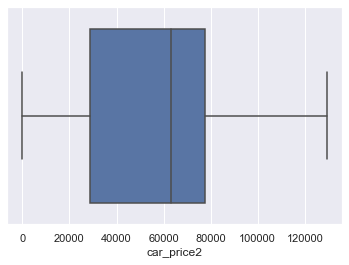

In [345]:
sns.boxplot(x = cars_df1['car_price2']);

<ipython-input-346-47d5007eba9d>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.boxplot(x=cars_df1[cars_df1['car_price2'] >25000][cars_df1['car_price2'] < 125000]['car_price2']);


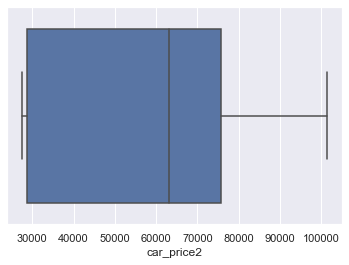

In [346]:
# Remove outliers in the car_price3 attribute
sns.boxplot(x=cars_df1[cars_df1['car_price2'] >25000][cars_df1['car_price2'] < 125000]['car_price2']);

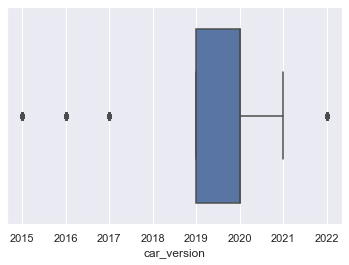

In [348]:
sns.boxplot(x = cars_df1['car_version']);

In [354]:
#sns.boxplot(x=cars_df1[cars_df1['car_version'] >2017[cars_df1['car_version'] < 2021]]['car_walk2']);

> Confusion Matrix

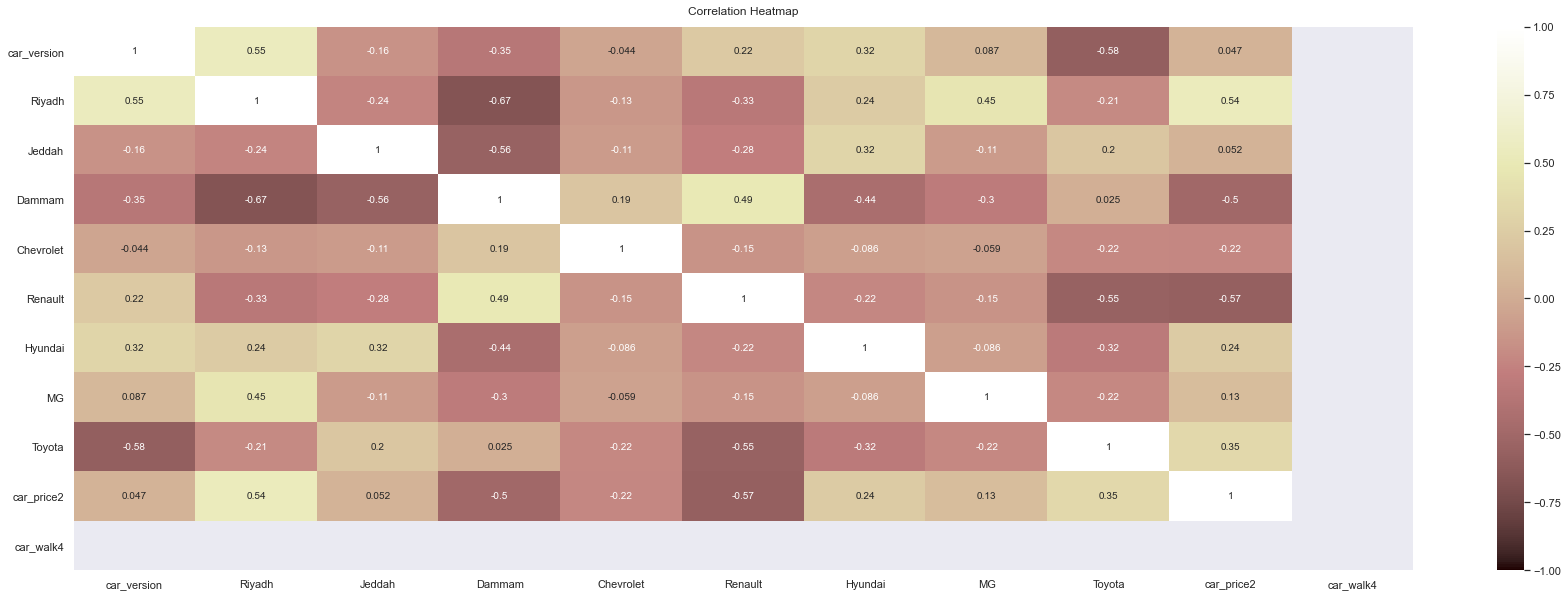

In [298]:

#corallation relatio to view high feauters 
plt.figure(figsize=(30,10))
heatmap = sns.heatmap(cars_df1.corr(), vmin=-1, vmax=1, annot=True, cmap="pink")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
plt.show()

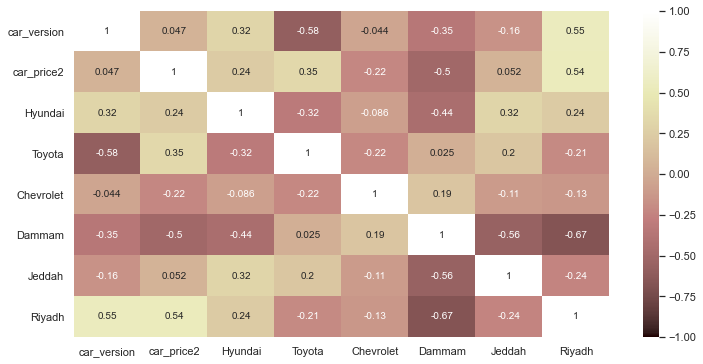

In [299]:
plt.figure(figsize=(12, 6))
heatmap = sns.heatmap(cars_df1[['car_version','car_price2','Hyundai','Toyota','Chevrolet','Dammam','Jeddah','Riyadh','car_walk2']].corr(), vmin=-1, vmax=1, annot=True,cmap='pink')
plt.show()

In [312]:
cars_df3= cars_df1

In [322]:
#cars_df3 =  cars_df3.drop(['car_name','car_price','car_brand','car_location','car_walk','car_walk1','car_walk2','car_walk3','car_walk4'], axis=1)

In [323]:
cars_df3

,car_version,Riyadh,Jeddah,Dammam,Chevrolet,Renault,Hyundai,MG,Toyota,car_price2
0,2020,1,0,0,0,0,0,1,0,74900
1,2021,1,0,0,0,0,0,0,1,129375
2,2020,0,1,0,0,0,1,0,0,77625
3,2020,0,1,0,0,0,0,0,1,60375
4,2016,0,1,0,0,0,0,0,1,47725
...,...,...,...,...,...,...,...,...,...,...
23971,2020,0,0,1,0,1,0,0,0,27600
23972,2020,0,0,1,0,1,0,0,0,28750
23973,2020,0,0,1,0,1,0,0,0,28750
23974,2020,0,0,1,0,1,0,0,0,28750


*************************************************************************************************************************

## Scaling MinMaxScaler, and StandardScaler

In [364]:
from sklearn.preprocessing import MinMaxScaler
# define min max scaler
scaler = MinMaxScaler()
# transform data
MinMax_scaled = scaler.fit_transform(X)
print(MinMax_scaled)

[[0.71428571 1.         0.         ... 0.         1.         0.        ]
 [0.85714286 1.         0.         ... 0.         0.         1.        ]
 [0.71428571 0.         1.         ... 1.         0.         0.        ]
 ...
 [0.71428571 0.         0.         ... 0.         0.         0.        ]
 [0.71428571 0.         0.         ... 0.         0.         0.        ]
 [1.         1.         0.         ... 0.         0.         0.        ]]


In [365]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# transform data
StandardScaler_scaled = scaler.fit_transform(X)
print(StandardScaler_scaled)

[[ 0.3592106   1.87082869 -0.4472136  ... -0.35355339  4.12310563
  -0.89442719]
 [ 0.89802651  1.87082869 -0.4472136  ... -0.35355339 -0.24253563
   1.11803399]
 [ 0.3592106  -0.53452248  2.23606798 ...  2.82842712 -0.24253563
  -0.89442719]
 ...
 [ 0.3592106  -0.53452248 -0.4472136  ... -0.35355339 -0.24253563
  -0.89442719]
 [ 0.3592106  -0.53452248 -0.4472136  ... -0.35355339 -0.24253563
  -0.89442719]
 [ 1.43684242  1.87082869 -0.4472136  ... -0.35355339 -0.24253563
  -0.89442719]]


## Spilt the Data Part

In [376]:
X ,y= cars_df3.drop('car_price2',axis=1), cars_df3['car_price2']

In [377]:
# 60% Train - 20% Val - 20% Test
X_train_or, X_test, y_train_or, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train_or, y_train_or, test_size=0.25)
X,y= np.array(X),np.array(y)

## Bulid Model

>LinearRegression

Create Method to calculate the Accuracy of train model and Cross-validation and The errors

In [378]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state = 71)
cv_lm_r2s, cv_lm_reg_r2s = [], [] # to collect the validation results for both models

for train_ind, val_ind in kf.split(X,y):
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind]
#simple linear regression
    lm = LinearRegression()
    lm_reg = Ridge(alpha=1)

    lm.fit(X_train, y_train)
    cv_lm_r2s.append(lm.score(X_val, y_val))

#ridge with feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)

    lm_reg.fit(X_train_scaled, y_train)
    cv_lm_reg_r2s.append(lm_reg.score(X_val_scaled, y_val))

print('Simple regression scores: ', cv_lm_r2s)
print('Ridge scores: ', cv_lm_reg_r2s, '\n')

print(f'Simple mean cv r^2: {np.mean(cv_lm_r2s):.3f} +- {np.std(cv_lm_r2s):.3f}')
print(f'Ridge mean cv r^2: {np.mean(cv_lm_reg_r2s):.3f} +- {np.std(cv_lm_reg_r2s):.3f}')



Simple regression scores:  [0.5939330595977974, 0.5765807172425175, 0.5927125020365219, 0.5834108879548628, 0.565437780050551]
Ridge scores:  [0.5938611831239773, 0.5765491772167006, 0.5926283543963635, 0.5833773241262326, 0.5654175542197708] 

Simple mean cv r^2: 0.582 +- 0.011
Ridge mean cv r^2: 0.582 +- 0.011


In [379]:
m = LinearRegression()

# train the model
m.fit(X, y)

LinearRegression()

In [380]:
print(m.score(X, y))
print(m.score(X_test, y_test))

0.5825141963519456
0.5907902424217558


*******************************************************************************************************************

In [381]:
def get_metrics(model):
    print(f'Train score {model.score(X_train, y_train)}')
    print(f'Val score {model.score(X_val, y_val)}')
    print("MAE:" , metrics.mean_absolute_error(y_val,model.predict(X_val)))
    print("MSE:" , metrics.mean_squared_error(y_val,model.predict(X_val)))
    print("RMSE:" , np.sqrt(metrics.mean_squared_error(y_val,model.predict(X_val))))

In [382]:
lr = LinearRegression()
lr.fit(X_train, y_train)
score = lr.score(X_val, y_val)
get_metrics(lr)

Train score 0.586854382124053
Val score 0.565437780050551
MAE: 12512.658602711157
MSE: 462203798.0871741
RMSE: 21498.925510061523


The  Accuracy of training appeared to us very low, we will try to improve it by increasing the number of features to raise it. A problem occurred Under-fit  due to many rows and few features 

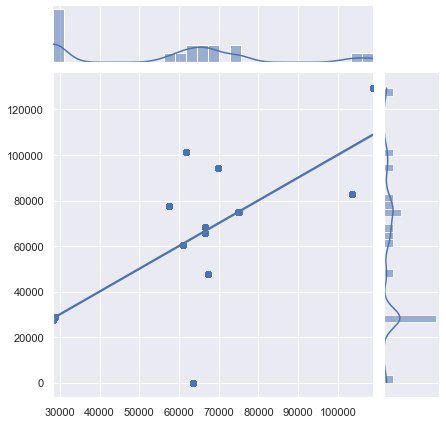

In [390]:
preds = lr.predict(X) # generate predictions (on training data) using fit model

sns.jointplot(x=preds,y=y, kind='reg');

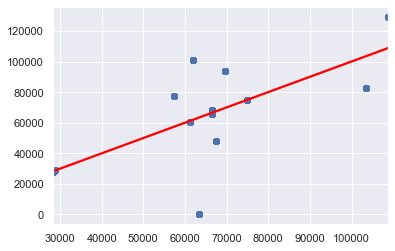

In [391]:
sns.regplot(x=preds, y=y, data=cars_df2, line_kws={'color':'red'})
plt.show()

--


C:\Users\abo fisel\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residual Histogram')

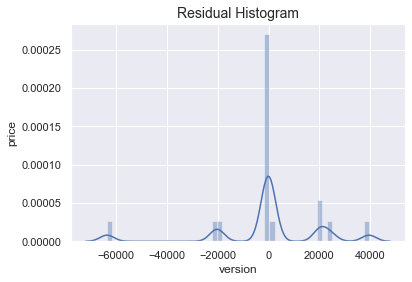

In [392]:
y_pred = lr.predict(X)

residuals = y - y_pred

sns.distplot(residuals);
plt.ylabel("price",fontsize=12)
plt.xlabel("version",fontsize=12)
plt.title('Residual Histogram',fontsize=14)



In [393]:
prediction = lr.predict(X_test)

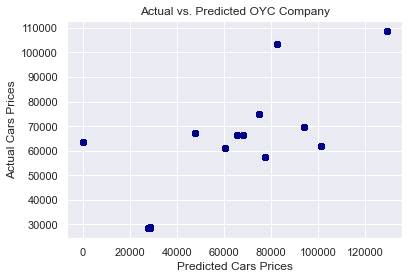

In [394]:
plt.scatter(y_test,prediction,alpha =0.2,color="DarkBlue")
plt.title('Actual vs. Predicted OYC Company')
plt.xlabel('Predicted Cars Prices')
plt.ylabel('Actual Cars Prices');

In [395]:
# Show the count of each value in car brand
cars_df1.car_brand.value_counts()

Toyota        10656
Renault        6660
Hyundai        2664
Chevrolet      1332
MG             1332
SAIC Motor     1332
Name: car_brand, dtype: int64

***********************************************************************************************************************************************************************

***********************************************************************************************************************************************************************

## Conclusion and Future Work :

We suggest that we collect features from another database because the current features were not enough for prediction, we need to provide new features to the dataset so that we can predict and improve a good model.

add new columns such as (fuel type, engine size, horsepower, ...)


***********************************************************************************************************************************************************************

***********************************************************************************************************************************************************************

                                                                 End Project

***********************************************************************************************************************************************************************

***********************************************************************************************************************************************************************

## Preseted By :

#### Nada Alqabbani
#### Shahad Almubki 
#### Asma Alsulami  

***********************************************************************************************************************************************************************

***********************************************************************************************************************************************************************

************************************************************** Thank you *************************************************************************************